In [ ]:
import random
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cd "/content/drive/MyDrive/Colab Notebooks/CITS5508"

/content/drive/MyDrive/Colab Notebooks/CITS5508


In [ ]:
# ls

batches.meta  data_batch_3  data_loader.py  Li_jiaze-MLP/  readme.html
data_batch_1  data_batch_4  lab05.ipynb     Li_Jiaze-MLP/  test_batch
data_batch_2  data_batch_5  Li_Jiaze-CNN/   __pycache__/


## Data preparation and visualisation

#### Step 1: Import the `DataLoader` class

In [ ]:
from data_loader import DataLoader

#### Step 2: Call the `load_batch` function

In [7]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

#### Step 3. A quick inspection of the outputs from the `load_batch` function

##### You need to split the training set to form a validation set. The original training set would become smaller.

In [8]:
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


### (i) Use an 85/15 random split on the training set to form a validation set.

In [9]:
from sklearn.model_selection import train_test_split

# random_state for reproducing 
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=5508)
 
print('x_train shape:', X_train.shape)
 
print('number of train examples:', X_train.shape[0])
print('number of valid examples:', X_val.shape[0])
print('number of test examples:', X_test.shape[0])

x_train shape: (42500, 32, 32, 3)
number of train examples: 42500
number of valid examples: 7500
number of test examples: 10000


### (ii) Display 20 randomly sampled images from the arguments.

In [10]:
import matplotlib.pyplot as plt
import random
def plot_20random(x_set,y_set):
  # x_set : picture pixel
  # y_set : the label of corresponding to the picture
  r_plot=[]
  for i in range(20):
      r_plot.append(random.randint(1,x_set.shape[0])) 
  plt.figure(figsize=(18,12))
  for j in r_plot: 
      plt.subplot(4,5,r_plot.index(j)+1)
      plt.grid(False)
      # plot an image using Matplotlib's imshow() with 'binary' color map
      plt.imshow(x_set[j,:,:,],cmap=plt.cm.binary)
      # show the corresponding class name of each image
      t = class_names[y_set[j]]
      plt.title(t) 
  plt.show()

a. training set

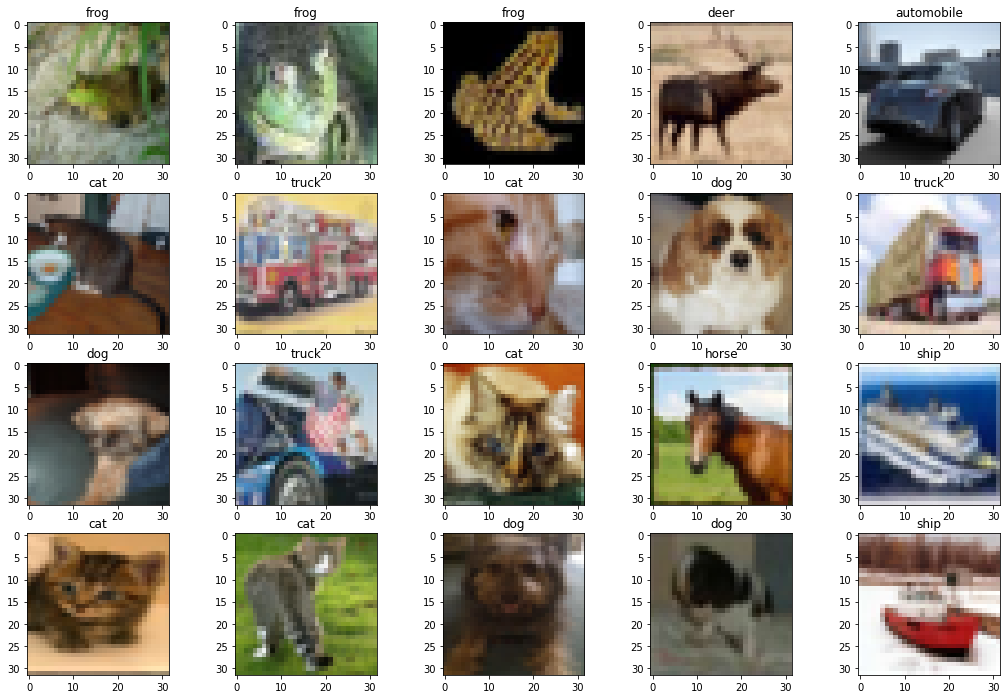

In [ ]:
plot_20random(X_train,y_train)

b. validation set

---



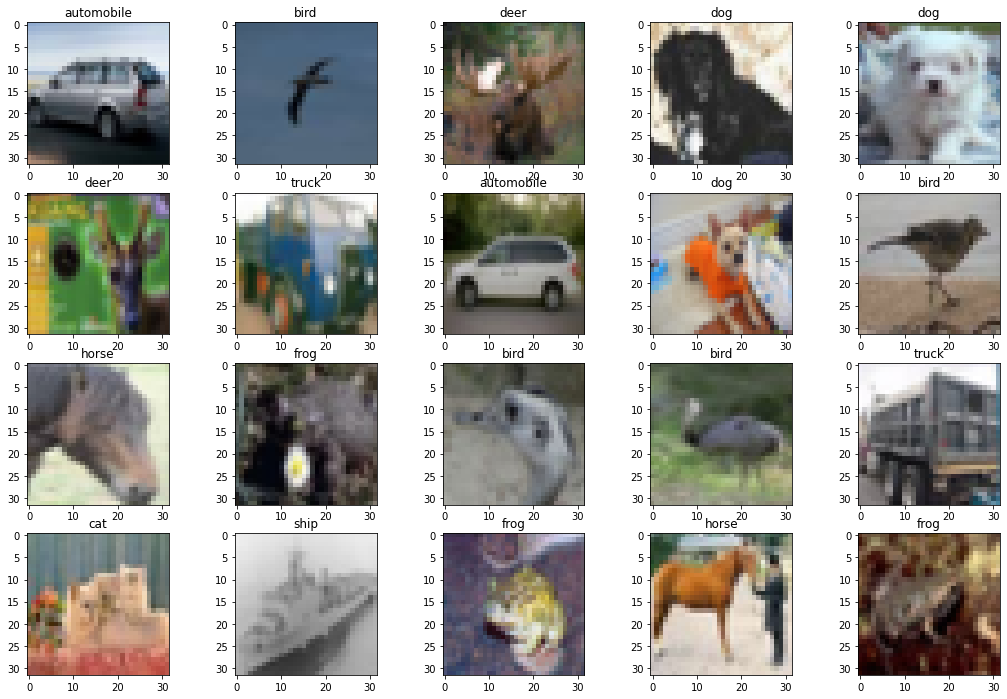

In [ ]:
plot_20random(X_val,y_val)

c.test set

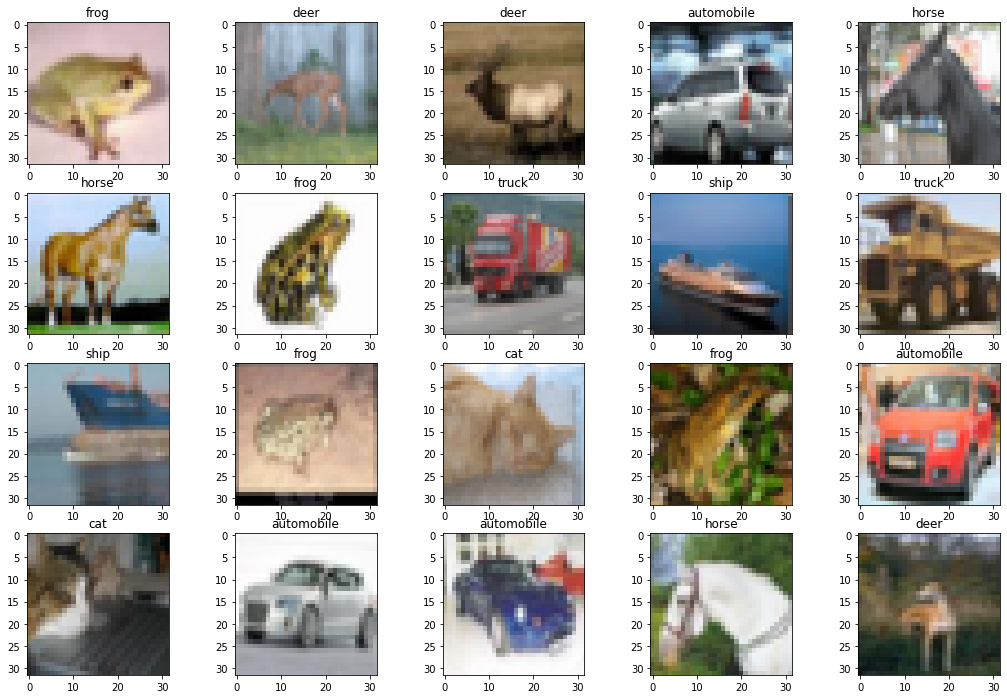

In [ ]:
plot_20random(X_test,y_test)

## Implementation of MLP

### (a) Hyperparameters

In [11]:
import numpy as np
import keras
from tensorflow import keras

num_classes = len(np.unique(y_train)) # num_classes = 10

#### transform labels into one-hot code

The labels are categorical values and needs to be converted to binary / continious data. This can be achived with the keras.utils.to_categorical callback.

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### 1. learning rate scheduling

epoch : the epochs of network fitting  lr : the learning rate

In [13]:
# define two learning rate schedulerd
def lr_scheduler1(epoch,lr):
  # a baseline scheduler, which will make comparison with scheduler2
  return lr
def lr_scheduler2(epoch,lr):
  if epoch<20:
    return lr
  else:
    return lr * np.exp(-0.1)


#### 2. Early stopping

In [14]:
# define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = True
)
# early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


#### 3. Hyperparameter tuning process

##### GridSearch together with the validation set created above to find the optimal value for each of them

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
num_classes = 10

This cell is for grid searching to determine hyperparameters : connection weight initialisation, schedulers and dropout rate. Combination dropout rates for the networks with the first 2 layers including the input one and every tuple is a combination for one experiment. All layers are applied to 'relu' activation and using validation set for test model performance, finally store model evaluations on the validation set.
1. connection weight initialisation: initias=['uniform','normal']
2. learning rate scheduling: schedulers=[lr_scheduler1,lr_scheduler2]
3. dropout rate: dropouts=[(0.1,0.1),(0.2,0.2)]

In [ ]:
# np.random.seed(5508)  # set for reproduction

# # 1. connection weight initialisation
# initias=['uniform','normal']
# # 2. learning rate scheduling
# schedulers=[lr_scheduler1,lr_scheduler2]
# # 3. dropout rate
# dropouts=[(0.1,0.1),(0.2,0.2)]
# # dropouts=[0.1,0.2]

# evaluator={} # a diction to store results

# # begin loop(pipeline)
# for i in dropouts:
#   for j in initias:
#     for k in schedulers:
#       # all hidden layers are applied to 'relu' activation
#       model = Sequential()
#       # flatten tensors, the inputshape should be consistent with X_train
#       model.add(Flatten(input_shape = X_train.shape[1:])) 
      
#       model.add(Dense(1024, activation='relu',kernel_initializer=j)) 
#       model.add(Dropout(i[0]))
#       model.add(Dense(512, activation='relu',kernel_initializer=j))
#       model.add(Dropout(i[1]))
#       model.add(Dense(256, activation='relu',kernel_initializer=j))

#       # Use alpha dropout in the last hidden layer.
#       # Drops nodes with 0 as output in each layer. 
#       # model.add(keras.layers.AlphaDropout(rate=i))

#       # Output layer.
#       # Since it is multiclass classification, we should use the softmax activation function.
#       # The dense is equeal to the number of classes in the dataset. 
#       model.add(Dense(num_classes, activation='softmax')) 

#       model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#       scheduler=tf.keras.callbacks.LearningRateScheduler(k)

#       # using validation set for test model performance, using early stopping defined above to speed up
#       history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=100, 
#                           shuffle=True, verbose=0, callbacks=[scheduler,early_stopping])
#       # store model evaluations on the validation set
#       evaluator[(i,j,k)]=model.evaluate(X_val,y_val)

# # end loop

235/235 [==============================] - 1s 2ms/step - loss: 1.6975 - accuracy: 0.4135


The results of gridsearch and hyperparameters ,using the best combination on the validation data set.

In [ ]:
# m_test=list(evaluator.items())

# m_test.sort(key=lambda x: x[1][1],reverse=True)

# best_parameters_test=m_test[0]
# best_parameters_test # the gridsearching result

(((0.2, 0.2), 'normal', <function __main__.lr_scheduler2>),
 [1.6974577903747559, 0.4134666621685028])

Construct MLP with hyperparameters determined above the combination of dropout rates are 0.2 and use the second learning rate scheduler and normal initializer. Train the network for 100 epochs but use the validation set for early stopping (which also helps to overcome overfitting).

### (b) Architecture

#### (1) Create Sequential MLP Model

In [16]:
optimizer = keras.optimizers.Nadam(learning_rate=7e-4)

MLP = Sequential()
MLP.add(Flatten(input_shape = X_train.shape[1:]))
# callbacks=[scheduler, early_stopping]
MLP.add(Dense(1024, activation='relu',kernel_initializer='normal'))
MLP.add(Dropout(0.2))
MLP.add(Dense(512, activation='relu',kernel_initializer='normal'))
MLP.add(Dropout(0.2))
MLP.add(Dense(256, activation='relu',kernel_initializer='normal'))

MLP.add(Dense(num_classes, activation='softmax'))

I build this MLP (Multi-layered Perceptron) model with 3 hidden layers of 1024, 512, 256 are the maximum number of neurons available in each layer respectively. These neurons will be activated with ReLU. The dropout rate is 0.2 which is very standard. 

The output is activated by `softmax`. This activation function is usually used for `multiclass classification problems`. When setting up layers and densities it is important to remember that each layer becomes increasingly abstract, which is why more layers are often better than adding neurons to the layers, but with a maximum of three layers in this lab and the relatively low accuracy of the model, I chose to increase the neurons in the layers to improve the accuracy of the model. ReLU is used as the weighted activation function when used.

#### (2) summary of MLP architecture.

In [ ]:
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2

The simplest is the Dense layer, i.e. the fully connected layer (FC), where the input parameters are the output of the previous layer, e.g. in the above figure, the Dense layer, the number of input parameters is 3072 (32*32*3), i.e. each neuron has 3072 inputs, according to the neuron formula Y = W*X + b, corresponding to 78400 w, plus bias b, for a total of ( 3072 + 1) parameters to train.

There are 1024 neurons in the dense layer, so the total number of parameters to be trained is (3072+1) × 1024 = 3146752;
1. dense_1 layer: (1024+1) x 512 = 524800   
2. dense_2 layer: (512+1)×256 = 131328
3. dense_3 layer: (256+1)×10=2570     


Total number of parameters to train (Trainable params: 3146752 +524800 +131328+2570=3,805,450)


### (c) Training and Testing

#### (1) Compile Model

In [ ]:
MLP.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

For compiling the model, I used the Nadam optimiser with a learning rate of 7e-4. I tried learning rates of 1e-5, 7e-4, 1e-3, 3e-3 and 1e-2 and compared the learning curves for each of the 10 periods (using the tension plate callbacks below.) The learning rates for 3e-5 and 7e-4 were quite good, so I tried 7e-4 with slightly better results. As the model is categorically encoded (one-hot encoding), the loss function categorical_crossentropy is used to solve the multi-categorization problem.

#### (2) train the model from scratch using the training and validation sets and save the trained model

The history of the model is fitted and trained to measure accuracy and loss. To prevent the model from future overfitting; early stopping is implemented along with a learning rate scheduler. The validation data is the valid sets, which means there is still data "hidden" from the model, which can help to idenfity if the model is overly adapted to the dataset.

In [20]:
import time
from keras.callbacks import ModelCheckpoint
np.random.seed(5508)
epochs = 100  # Number of training iterations
scheduler=tf.keras.callbacks.LearningRateScheduler(lr_scheduler2)

start_mlp =time.time()
history = MLP.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val), 
                 verbose=1, shuffle=True, callbacks=[scheduler, early_stopping])
end_mlp=time.time()

Epoch 1/100
665/665 [==============================] - 9s 7ms/step - loss: 1.9679 - accuracy: 0.2876 - val_loss: 2.2600 - val_accuracy: 0.1785 - lr: 7.0000e-04
Epoch 2/100
665/665 [==============================] - 4s 6ms/step - loss: 1.7580 - accuracy: 0.3690 - val_loss: 1.7983 - val_accuracy: 0.3603 - lr: 7.0000e-04
Epoch 3/100
665/665 [==============================] - 4s 6ms/step - loss: 1.6847 - accuracy: 0.3973 - val_loss: 1.7061 - val_accuracy: 0.3804 - lr: 7.0000e-04
Epoch 4/100
665/665 [==============================] - 4s 6ms/step - loss: 1.6298 - accuracy: 0.4156 - val_loss: 1.8714 - val_accuracy: 0.3443 - lr: 7.0000e-04
Epoch 5/100
665/665 [==============================] - 4s 6ms/step - loss: 1.5960 - accuracy: 0.4282 - val_loss: 1.6752 - val_accuracy: 0.3980 - lr: 7.0000e-04
Epoch 6/100
665/665 [==============================] - 4s 6ms/step - loss: 1.5589 - accuracy: 0.4388 - val_loss: 1.5508 - val_accuracy: 0.4407 - lr: 7.0000e-04
Epoch 7/100
665/665 [===================

 computation time

In [21]:
print('MLP Model running time: %s Seconds'%(end_mlp-start_mlp))

MLP Model running time: 210.55289673805237 Seconds


save the model

In [ ]:
MLP.save("Li_Jiaze-MLP")

INFO:tensorflow:Assets written to: Li_Jiaze-MLP/assets


#### (3) load the saved model model and train it for just 1 more epoch

In [ ]:
MLP_cb=keras.models.load_model('Li_Jiaze-MLP') # callback
MLP_cb.fit(X_train,y_train,epochs=1,batch_size=64,callbacks=[scheduler])

665/665 [==============================] - 5s 6ms/step - loss: 1.0070 - accuracy: 0.6358 - lr: 4.7044e-05


### (d) Classification results - Evaluation

evaluate on test set

In [ ]:
scores_mlp = MLP_cb.evaluate(X_test, y_test)
pred_mlp = MLP_cb.predict(X_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3161 - accuracy: 0.5429


plot acc curves and loss curves 

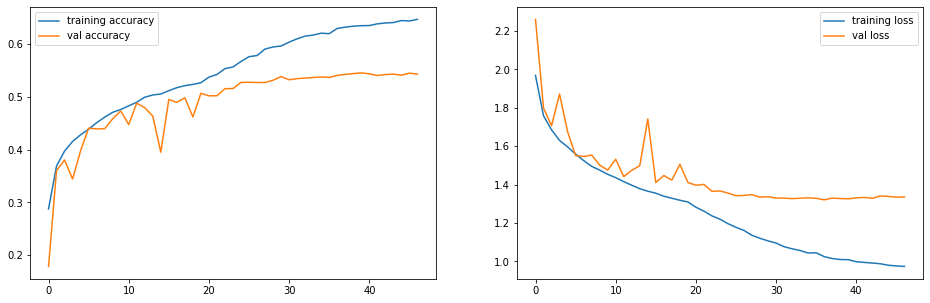

In [65]:
plt.figure(figsize=(16, 5))

mlp_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mlp_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(mlp_acc, label='training accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_loss, label='training loss')
plt.plot(val_loss, label='val loss')
plt.legend()


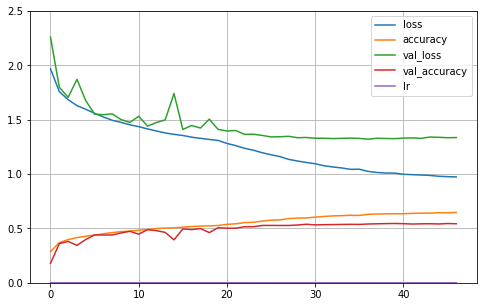

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2.5)
plt.show()

Scoring/evaluation of the model: This will measure the ability of the model to compute new data based on the adaptation patterns from previous training. The results indicate that the model may have a tendency to overfit (which is to be expected in classification). The model has an overall training accuracy of slightly more than 65%, but for unknown data, the accuracy is slightly more than 55%. The overall conclusion is that measures to prevent overfitting should be considered in order to further improve the model, but the model actually performs quite poorly on known data as well. This may indicate that the model is also currently under-fitted and that it is often difficult to compute patterns. Models that lack the required complexity cannot handle the required parameters to make reliable predictions.

evaluate on test set

In [ ]:
loss_test, acc_test = MLP.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss_test)
print('Test acc:', acc_test)

Test loss: 1.3002573251724243
Test acc: 0.5478000044822693


Confusion matrix and calculate accuracy, precision and f1-score on test set for each class

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_mtx_mlp=confusion_matrix(y_test.argmax(1),pred_mlp.argmax(1))

recall=tf.keras.metrics.Recall()
precision=tf.keras.metrics.Precision()
recall.update_state(y_test,pred_mlp)
precision.update_state(y_test,pred_mlp)
f1_mlp=2*(precision.result()*recall.result()/(precision.result()+recall.result()))
print('Accuracy = ', scores_mlp[1])
print('confusion matrix = \n', confusion_mtx_mlp)
print('F1 score=' ,f1_mlp.numpy())

Accuracy =  0.542900025844574
confusion matrix = 
 [[586  28  65  29  39  10  32  24 130  57]
 [ 27 664  19  18   8  15  18  17  63 151]
 [ 71  18 379  96 161  58 132  49  17  19]
 [ 20  15  88 369  77 165 151  47  26  42]
 [ 38   5 110  63 489  44 128  76  31  16]
 [ 15   7  87 219  86 390  97  59  23  17]
 [  6   9  61  64 117  36 663  11  15  18]
 [ 35   9  45  67  82  77  41 597  13  34]
 [ 85  68  13  28  21  13  16  13 689  54]
 [ 31 178   7  30  12  15  24  40  60 603]]
F1 score= 0.5024487


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred_classes_mlp = MLP.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes_mlp = np.argmax(pred_mlp, axis=1) 
# Convert validation observations to one hot vectors
Y_true_mlp = np.argmax(y_test, axis=1)
print(classification_report(Y_true_mlp, Y_pred_classes_mlp))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      1000
           1       0.66      0.62      0.64      1000
           2       0.49      0.38      0.42      1000
           3       0.40      0.35      0.37      1000
           4       0.45      0.53      0.49      1000
           5       0.48      0.43      0.45      1000
           6       0.53      0.66      0.59      1000
           7       0.63      0.60      0.61      1000
           8       0.62      0.71      0.66      1000
           9       0.58      0.64      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000



Heatmap of classes and predictions

[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

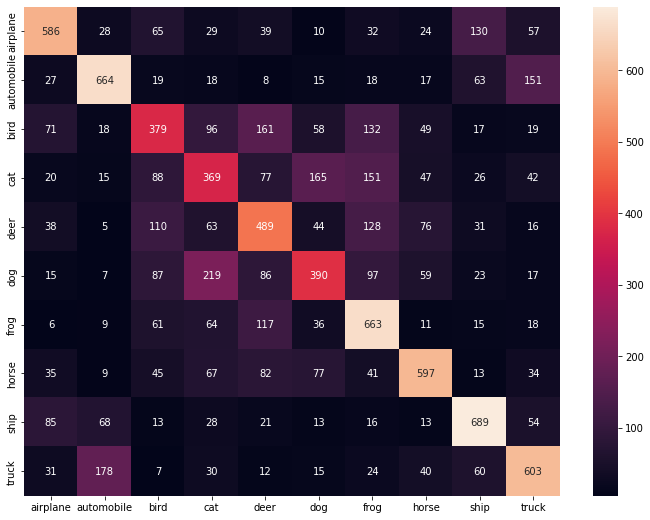

In [30]:
import seaborn as sns
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(confusion_mtx_mlp, annot=True, fmt='g')
heatmap.set(xticklabels=class_names, yticklabels=class_names)

The confusion matrix looks OK as most of the images lie on the main diagonal, which indicates that they have been correctly classified. The four classes in the middle look darker than the others, which could be that the classifier does not perform as well on that class as it does on the other classes.

##### Display correctly classified images and failure cases for the test set.
    # red indicates incorrect, with the correct label in the bracket;
    # green indicates correct

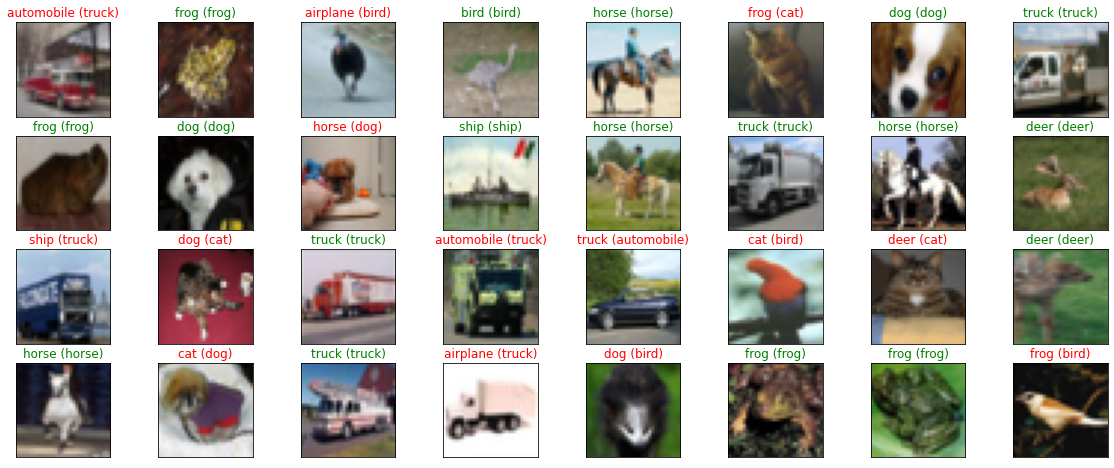

In [ ]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
  ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_test[idx])) # back transform the initial pixels
  pred_idx = np.argmax(pred_mlp[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                color=("green" if pred_idx == true_idx else "red"))

## Implementation of CNN

### (a) Hyperparameters

In [31]:
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

#### Hyperparameter tuning process - Initialize a CNN model for gridsearching

##### GridSearch together with the validation set created above to find the optimal value for each of them

This cell is for grid searching to determine hyperparameters : kernel size, filters and activation. Combination dropout rates for the networks with the first 2 layers including the input one and every tuple is a combination for one experiment. Using validation set for test model performance, finally store model evaluations on the validation set.
1. "kernel_size": the kernel size in each CNN layer during one experiment, and it should be expand to 1 by 2 tuple.
2. "filter": number of kernels, the filters in each CNN layer during one experiment. 
3. "activation": be the activation function. 

In [ ]:
# params={'filter':[(32,32,64),(16,32,64)],
#         'kernel_size':[(5,3,3),(7,5,3)],
#         'activation':[ReLU(), LeakyReLU(0.1)]} # the slope of leakyRelu is 0.1

# # for i in filter:
# #   for j in kernel_size:
# #     for k in activation:
# # def GridSearch_CNN(filters=(64,32,32),kernel_size=(2,3,2),act=LeakyReLU(0.1)):
# def GridSearch_CNN(filter,kernel_size,activation):
  
#   model = Sequential()
#   # input layer
#   model.add(Conv2D(filters=filter[0], kernel_size=(kernel_size[0],kernel_size[0]), padding='same', activation=activation, input_shape=(32,32,3)))
#   model.add(MaxPooling2D(pool_size=2))
#   # 
#   model.add(Conv2D(filters=filter[1], kernel_size=(kernel_size[1],kernel_size[1]), padding='same', activation=activation))
#   model.add(MaxPooling2D(pool_size=2))
#   model.add(Conv2D(filters=filter[2], kernel_size=(kernel_size[2],kernel_size[2]), padding='same', activation=activation))
#   model.add(MaxPooling2D(pool_size=2))
#   model.add(Dropout(0.1))
#   model.add(Flatten())
#   model.add(BatchNormalization())
#   model.add(Dense(500, activation=activation,kernel_initializer='normal'))
#   model.add(Dropout(0.1))
  
#   # output:10
#   model.add(Dense(num_classes, activation='softmax'))
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model



In [ ]:
# evaluator_cnn={}
# np.random.seed(55)

# for i in params['filter']:
#   for j in params['kernel_size']:
#     for k in params['activation']:
#       model_gs_cnn=GridSearch_CNN(i,j,k)
#       model_gs_cnn.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=(X_val,y_val),
#                 shuffle=True,verbose=0,callbacks=[early_stopping,scheduler])
#       evaluator_cnn[(i,j,k)]=model.evaluate(X_val,y_val)

In [ ]:
# metrix_gs_cnn=list(evaluator_cnn.items())
# metrix_gs_cnn.sort(key=lambda x: x[1][1],reverse=True)

# parameter_gs_cnn=metrix_gs_cnn[0]
# parameter_gs_cnn

(((32, 32, 64),
  (5, 3, 3),
  <keras.layers.advanced_activations.ReLU at 0x7f56acd52690>),
 [1.5261591672897339, 0.452266663312912])

The results of gridsearch show that filters are (32,32),(32,32),(64,64) for each convolutional lays, all of which use (5,5),(3,3) (3,3) kernel and use Relu activation.

### (b) Architecture

#### (1) Create Sequential CNN Model

In [ ]:
keras.optimizers.SGD(lr=1e-2)

# keras.backend.clear_session()
tf.random.set_seed(55)
np.random.seed(55)

model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    # pooling layer between consecutive convolutional layers
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, activation='relu',kernel_initializer='normal'),
    keras.layers.Dropout(0.2),

    # output:10
    keras.layers.Dense(num_classes, activation='softmax')
    
])

# model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


 The CNN model is constructed by 3 convolutional layers of 16, 32, 64 are the maximum number of neurons available in each layer respectively and a hidden full connection layer, connected with a batch normalization layer. These neurons will be activated with ReLU. The dropout rate is 0.2 which is very standard. 

#### (2) summary of CNN architecture.

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

The essence of Conv2D layer is to train the convolutional kernel. Suppose the input is i, the number of convolutional kernels in this layer is j, and the number of convolutional kernels is n*m, then the number of parameters to be trained is: N = (n * m * i+1) * j
1. Conv2d_3 layer, i=1,j=16,n=m=5, so N=(5 * 5 * 3+1) * 16=2432.
2. Conv2d_4 layer, i=16,j=32,n=m=3,so N=(3 * 3 * 32+1) * 32=9248;
3. Conv2d_5 layer, i=32,j=64,n=m=3, so N=(3 * 3 * 32+1) * 64=18496;
   
The pooling layer (MaxPooling 2D) has no parameters to train.

1. dense_2 layer: (1024+1)×500=512500
2. dense_3 layer: (500+1)×10=5010   
     
Total number of trainable params: 2432 +9248 +18496 +4096+ 512500 +5010 = 551,782



### (c) Training and Testing

#### (1) Compile Model

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

For compiling the model, the loss is measured in categorical_crossentropy because the model is categorically encoded (one-hot encoding), the loss function categorical_crossentropy is used to solve the multi-categorization problem. As optimizer the model compiles with the Nadam optimiser with a learning rate of 7e-4. I tried learning rates of 1e-5, 7e-4, 1e-3, 3e-3 and 1e-2 and compared the learning curves for each of the 10 periods (using the tension plate callbacks below.) The learning rates for 3e-5 and 7e-4 were quite good, so I tried 7e-4 with slightly better results. As the model is categorically encoded (one-hot encoding), the loss function categorical_crossentropy is used to solve the multi-categorization problem. In supervised learning, we allready know what the true labels should be. The learning is then based on the model adjusting its algorithm to fit the true labels. Backpropagation helps the algorithm the improve based on previous output throughout a training iteration.

Parameters of full dense layer are the same as MLP, i.e., sheduler and weights initializer. And the same dropout.

In [60]:
import time
start_cnn = time.time()
history_model_cnn = model_cnn.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val), 
                verbose=1, shuffle=True, callbacks=[scheduler,early_stopping])
end_cnn = time.time()

Epoch 1/100
665/665 [==============================] - 6s 8ms/step - loss: 1.5115 - accuracy: 0.4556 - val_loss: 1.3519 - val_accuracy: 0.5232 - lr: 1.7262e-04
Epoch 2/100
665/665 [==============================] - 4s 7ms/step - loss: 1.2361 - accuracy: 0.5578 - val_loss: 1.1844 - val_accuracy: 0.5877 - lr: 1.7262e-04
Epoch 3/100
665/665 [==============================] - 5s 7ms/step - loss: 1.1295 - accuracy: 0.5989 - val_loss: 1.2001 - val_accuracy: 0.5759 - lr: 1.7262e-04
Epoch 4/100
665/665 [==============================] - 4s 7ms/step - loss: 1.0533 - accuracy: 0.6279 - val_loss: 1.0797 - val_accuracy: 0.6159 - lr: 1.7262e-04
Epoch 5/100
665/665 [==============================] - 4s 7ms/step - loss: 0.9915 - accuracy: 0.6491 - val_loss: 1.0520 - val_accuracy: 0.6309 - lr: 1.7262e-04
Epoch 6/100
665/665 [==============================] - 5s 7ms/step - loss: 0.9437 - accuracy: 0.6653 - val_loss: 0.9944 - val_accuracy: 0.6461 - lr: 1.7262e-04
Epoch 7/100
665/665 [===================

 computation time

In [61]:
print('CNN model running time: %s Seconds'%(end_cnn-start_cnn))

CNN model running time: 163.99997758865356 Seconds


save the model

In [ ]:
model_cnn.save('Li_Jiaze-CNN')

INFO:tensorflow:Assets written to: Li_Jiaze-CNN/assets


INFO:tensorflow:Assets written to: Li_Jiaze-CNN/assets


#### (3) load the saved model model and train it for just 1 more epoch

In [ ]:
model_cnn_cb=keras.models.load_model('Li_Jiaze-CNN')
model_cnn_cb.fit(X_train,y_train,epochs=1,batch_size=64,callbacks=[scheduler])

665/665 [==============================] - 5s 6ms/step - loss: 0.4098 - accuracy: 0.8562 - lr: 3.4851e-05


evaluate on test set

In [ ]:
scores_cnn=model_cnn_cb.evaluate(X_test,y_test)
pred_cnn=model_cnn_cb.predict(X_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7901 - accuracy: 0.7411


### (d) Classification results - Evaluation

plot acc curves and loss curves 

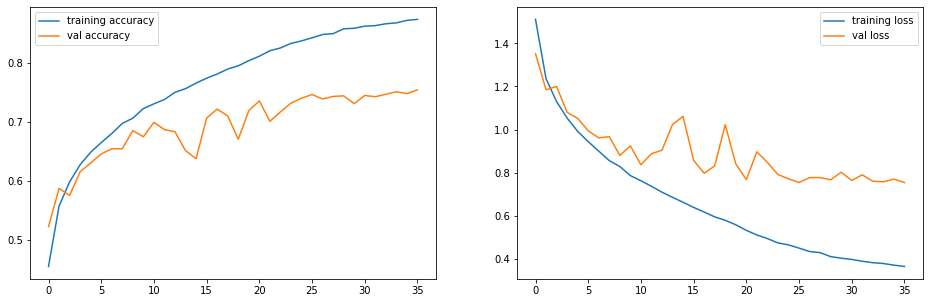

In [64]:
plt.figure(figsize=(16, 5))

acc_cnn=history_model_cnn.history['accuracy']
val_acc=history_model_cnn.history['val_accuracy']
loss_cnn=history_model_cnn.history['loss']
val_loss=history_model_cnn.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc_cnn,label='training accuracy')
plt.plot(val_acc,label='val accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss_cnn,label='training loss')
plt.plot(val_loss,label='val loss')
plt.legend()

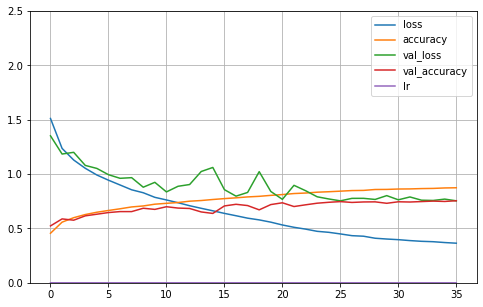

In [63]:
import pandas as pd

pd.DataFrame(history_model_cnn.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2.5)
plt.show()

Confusion matrix and calculate accuracy, precision and f1-score on test set for each class

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred_model_cnn = model_cnn.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes_cnn = np.argmax(pred_model_cnn, axis=1) 
# Convert validation observations to one hot vectors
Y_true_cnn = np.argmax(y_test, axis=1)
print(classification_report(Y_true_cnn, Y_pred_classes_cnn))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.89      0.85      0.87      1000
           2       0.68      0.67      0.68      1000
           3       0.63      0.54      0.59      1000
           4       0.71      0.75      0.73      1000
           5       0.64      0.68      0.66      1000
           6       0.82      0.82      0.82      1000
           7       0.76      0.85      0.80      1000
           8       0.86      0.86      0.86      1000
           9       0.84      0.83      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [70]:
confusion_mtx_cnn=confusion_matrix(y_test.argmax(1),pred_cnn.argmax(1))

recall_cnn=tf.keras.metrics.Recall()
precision_cnn=tf.keras.metrics.Precision()
recall_cnn.update_state(y_test,pred_cnn)
precision_cnn.update_state(y_test,pred_cnn)
f1_cnn=2*(precision_cnn.result()*recall_cnn.result()/(precision_cnn.result()+recall_cnn.result()))
print('Accuracy = ', scores_cnn[1])
print('confusion matrix = \n', confusion_mtx_cnn)
print('F1 score=' ,f1_cnn.numpy())

Accuracy =  0.741100013256073
confusion matrix = 
 [[825  16  28  13  10   3   5   9  65  26]
 [ 25 852   1   7   2   4   1   2  29  77]
 [ 88   5 620  40 102  52  34  38  14   7]
 [ 39  13  66 510  77 146  53  40  20  36]
 [ 31   3  45  35 737  23  23  84  12   7]
 [ 20   2  59 147  57 610  18  55  15  17]
 [ 16   7  56  44  71  11 768  10  10   7]
 [ 20   3  30  25  44  49   3 808   7  11]
 [ 60  26  10   7   4   2   1   5 864  21]
 [ 35  82   6   5   6   4   4  10  31 817]]
F1 score= 0.7416626


Heatmap of classes and predictions

[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

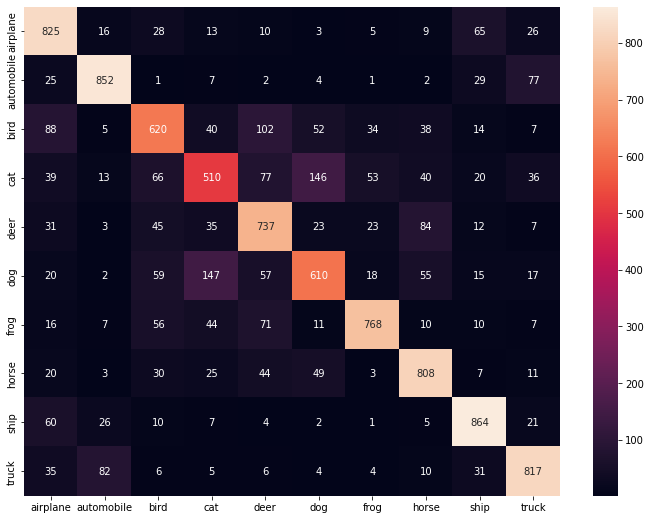

In [71]:
import seaborn as sns

plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(confusion_mtx_cnn, annot=True, fmt='g')
heatmap.set(xticklabels=class_names, yticklabels=class_names)

The confusion matrix looks good as most of the images lie on the main diagonal, which indicates that they have been correctly classified. The middle four classes still look darker than the other classes, which may be a sign that the classifier is not performing as well on that class as on the other classes.

#### Display correctly classified images and failure cases for the test set.
    # red indicates incorrect, with the correct label in the bracket;
    # green indicates correct

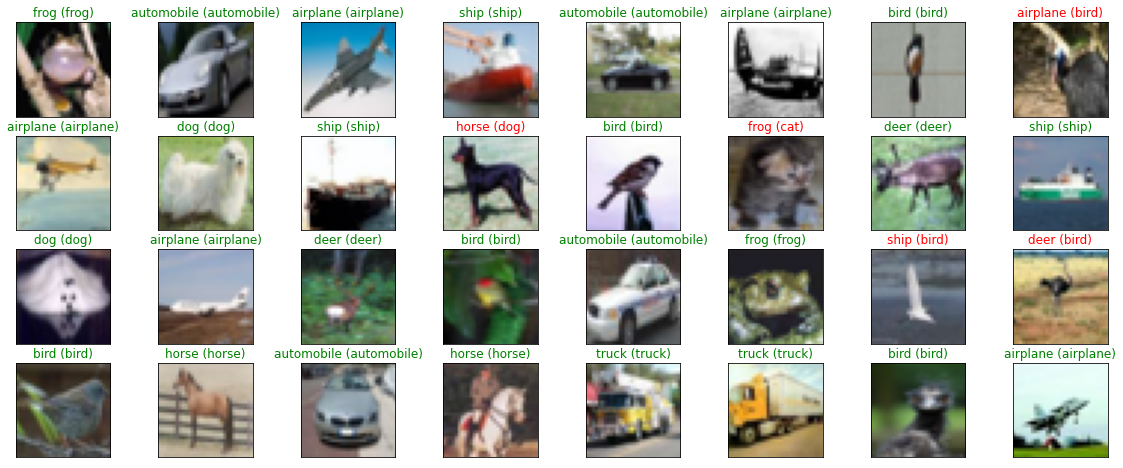

In [ ]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
  ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_test[idx])) # back transform the initial pixels
  pred_idx = np.argmax(pred_cnn[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                color=("green" if pred_idx == true_idx else "red"))

## MLP & CNN Comparison & Summary

#### a. Classification performance (accuracy, F1 score, precision per class)


##### for MLP model

In [ ]:
Y_pred_classes_mlp = MLP.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes_mlp = np.argmax(pred_mlp, axis=1) 
# Convert validation observations to one hot vectors
Y_true_mlp = np.argmax(y_test, axis=1)
print(classification_report(Y_true_mlp, Y_pred_classes_mlp))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      1000
           1       0.66      0.62      0.64      1000
           2       0.49      0.38      0.42      1000
           3       0.40      0.35      0.37      1000
           4       0.45      0.53      0.49      1000
           5       0.48      0.43      0.45      1000
           6       0.53      0.66      0.59      1000
           7       0.63      0.60      0.61      1000
           8       0.62      0.71      0.66      1000
           9       0.58      0.64      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000



the accurancy in the test set of MLP model is 0.55, and the precision of each class is 0.63, 0.66, 0.49, 0.40, 0.45, 0.48, 0.53, 0.63, 0.62, 0.58 respectively, and the f1-score of each class is 0.60, 0.64, 0.42, 0.37, 0.49, 0.45, 0.59, 0.61, 0.66, 0.60 respectively. The model does not classify images of: birds, cats, deers, dogs or frogs very well. 
The model is not complex enough to calculate the patterns, especially the patterns of these five labels could not get the desired results. For this case, I tried adding data to the model to enhance the training and more layers, but the accuracy did not improve at all stages and it took a long time. So to get a higher accuracy model, we should choose a more complex classification model architecture, for example CNN (Convolutional Neural Network). 



##### for CNN model

In [ ]:
pred_model_cnn = model_cnn.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes_cnn = np.argmax(pred_model_cnn, axis=1) 
# Convert validation observations to one hot vectors
Y_true_cnn = np.argmax(y_test, axis=1)
print(classification_report(Y_true_cnn, Y_pred_classes_cnn))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.89      0.85      0.87      1000
           2       0.68      0.67      0.68      1000
           3       0.63      0.54      0.59      1000
           4       0.71      0.75      0.73      1000
           5       0.64      0.68      0.66      1000
           6       0.82      0.82      0.82      1000
           7       0.76      0.85      0.80      1000
           8       0.86      0.86      0.86      1000
           9       0.84      0.83      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



The accurancy in the test set of CNN model is 0.76, and the precision of each class is 0.81, 0.89, 0.68, 0.63, 0.71, 0.64, 0.82, 0.76, 0.86, 0.84 respectively, and the f1-score of each class is 0.80, 0.87, 0.68, 0.59, 0.73, 0.66, 0.82, 0.80, 0.86, 0.83 respectively. In general, the classification performance of the more complex CNN model is much better than that of the MLP model, but it is found that the CNN model is also not accurate(lower than 0.8) in recognizing these four categories(bird, cat, deer, dog), so perhaps we can improve the accuracy of the model in recognizing these four categories by preprocessing the images in the future training.

In the acc and losscurves we can clearly see that CNNs are more accurate than MLP neural networks. In addition, the loss drops quickly and converges well compared to MLP.

#### b. Confusion matrix

[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

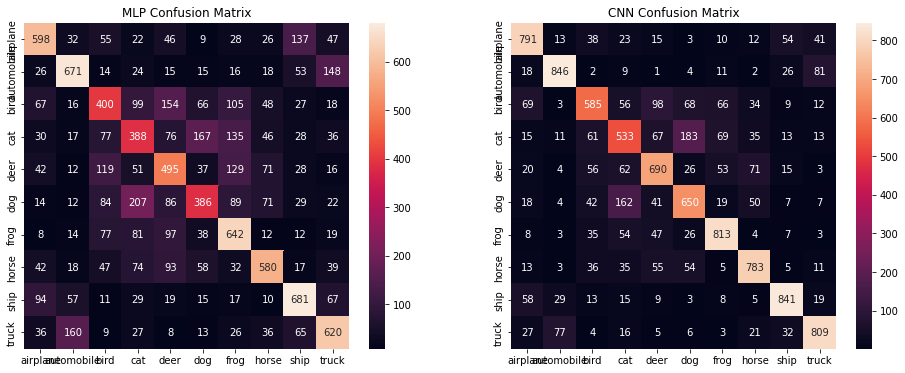

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.title("MLP Confusion Matrix")
heatmap = sns.heatmap(confusion_mtx_mlp, annot=True, fmt='g')
heatmap.set(xticklabels=class_names, yticklabels=class_names)

plt.subplot(1,2,2)
plt.title("CNN Confusion Matrix")
heatmap = sns.heatmap(confusion_mtx_cnn, annot=True, fmt='g')
heatmap.set(xticklabels=class_names, yticklabels=class_names)

As can be seen from the visualisation of the confusion matrices for both models above, the confusion matrices for both models look good as most of the images lie on the main diagonal and the main diagonal is very obvious, indicating that they have both been classified approximately correctly. However, on closer comparison, the confusion matrix of the MLP model still has some of the lighter classes scattered outside the centre line, indicating that the CNN model is outperforming the MLP model.
However, the middle four classes on the diagonal of the confusion matrix for both models still appear darker than the other classes, which is probably because the performance of both classifiers on these classes is not as good as on the other classes.

#### c. Model complexity (e.g., number of trainable parameters)


The trainable params of MLP model are 3,805,450 while CNN model have 551,782 trainable params. CNN model has a more complex network structure containing convolutional and full dense layers, while MLP has only full dense layers, so if we wants to get the result from MLP, then more neurons are activated, and because all neurons are fully connected, it leads to have more trainable parameters than CNN.

#### d. Computation time


In [ ]:
print('MLP Model running time: %s Seconds'%(end_mlp-start_mlp))

MLP Model running time: 210.55289673805237 Seconds


In [ ]:
print('CNN model running time: %s Seconds'%(end_cnn-start_cnn))

CNN model running time: 163.99997758865356 Seconds


The CNN model has a shorter whole runtime than the MLP model and it takes 4s to train CNN for every epoch while 7s to train MLP. Maybe that is because CNN model has a more complex network structure containing convolutional and full dense layers, while MLP has only full dense layers.

#### e. Comment on displaying a few correctly classified images and a few failure cases for the test set (above)
    # red indicates incorrect, with the correct label in the bracket;
    # green indicates correct

For the MLP model, we can see from the comparison of the prediction graphs that the prediction accuracy of the MLP model is not very high, and 14 of the 32 test images are wrong. For CNN model, the accuracy is very high, but the errors are mainly in dog, bird, frog, cat. Next, we can  turning the hyperparameters or try other neural classification models to improve the accuracy of the model.